In [3]:
import dicom
import os.path
from glob import glob
import numpy as np
import pylab as plb
import pandas as pd
#print os.path.relpath(".","..")


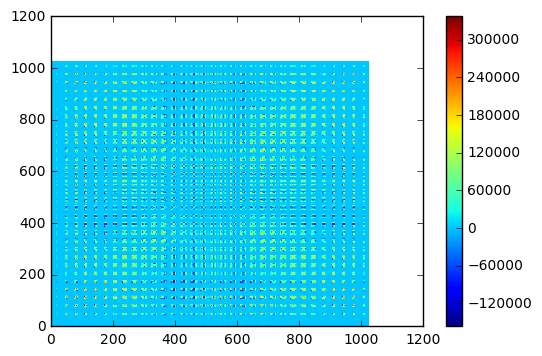

In [4]:
path = 'DOI/LUNG1-003/1.3.6.1.4.1.32722.99.99.247726286795860121686796574974227334270/1.3.6.1.4.1.32722.99.99.238922279929619243990469813419868528595'
num_files = len([f for f in os.listdir(path)
                if os.path.isfile(os.path.join(path, f))])
#print "num files in folder" num_files 
file_list = glob(os.path.join(path,'*.dcm'))
image_list = []
SCALE_CONST = 16
for dicom_file in file_list:
    image = dicom.read_file(dicom_file)
    image_features = [np.mean([image.pixel_array[SCALE_CONST*i+i2][SCALE_CONST*j+j2] for j2 in range(SCALE_CONST) for i2 in range(SCALE_CONST)]) for j in range(image.Columns/SCALE_CONST) for i in range(image.Rows/SCALE_CONST)]
    #image_features = [image.pixel_array[i][j] for j in range(image.Columns) for i in range(image.Rows)]
    image_list.append(image_features)
#now image_list is 107x262144
image_list = np.array(image_list)
std_list = np.std(image_list,axis=1)
zero_std_index = []
for i in range(std_list.shape[0]):
    if std_list[i]==0:
        zero_std_index.append(i)
image_list = np.delete(image_list,zero_std_index,1)
image_cov = np.cov(image_list.T)
plb.pcolor(image_cov)
plb.colorbar()
plb.show()